In [1]:
# Supervised classification problem

# 0 = active, 1 = former

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

!pip install chart-studio
from chart_studio.plotly import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

from plotly.offline import iplot, init_notebook_mode

     |████████████████████████████████| 81kB 3.1MB/s 
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install cufflinks
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline = True)
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

     |████████████████████████████████| 41.5MB 1.3MB/s 
ERROR: plotly-express 0.4.0 has requirement plotly>=4.0.0, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.0.0
    Uninstalling plotly-4.0.0:
      Successfully uninstalled plotly-4.0.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [5]:
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [6]:
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import numpy as np 

In [7]:
cf.getThemes()
cf.set_config_file(theme = 'solar')

In [8]:
df = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [9]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [10]:
# Copy of original 
df_a = df.copy()
df_a.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df_a.columns.to_series().groupby(df_a.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [12]:
df_a.isnull().sum()
# df_a.info()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df_a.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


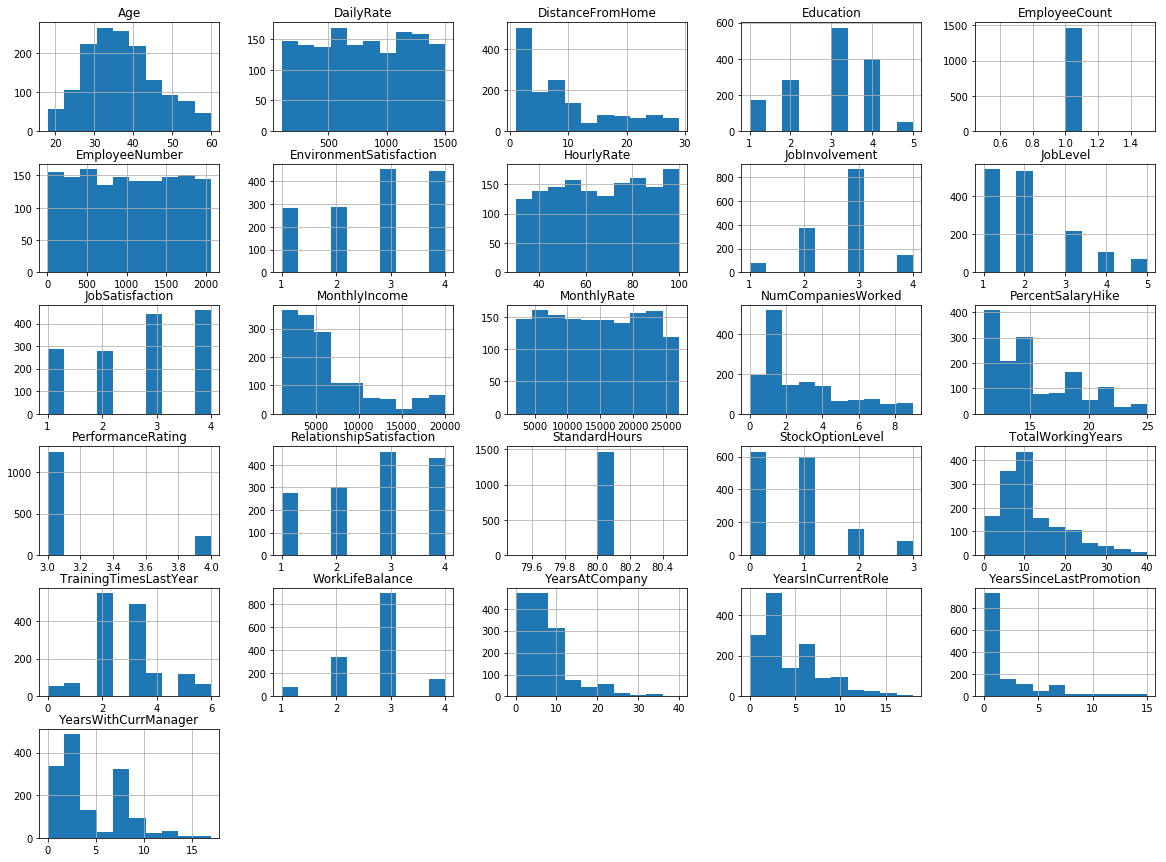

In [14]:
df_a.hist(figsize = (20, 15))
plt.show()

In [15]:
# Feature distributions
    # Label = attrition

(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'Yes', 'Age'])

print( 'Ex-employees: avg. age = {:.1f} old and s.d. = {:.1f}'.format(mu, sigma))

(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'No', 'Age'])

print( 'Current employees: avg. age = {:.1f} old and s.d. = {:.1f}'.format(mu, sigma))

Ex-employees: avg. age = 33.6 old and s.d. = 9.7
Current employees: avg. age = 37.6 old and s.d. = 8.9


In [16]:
# Age distributions only differ by 1 year

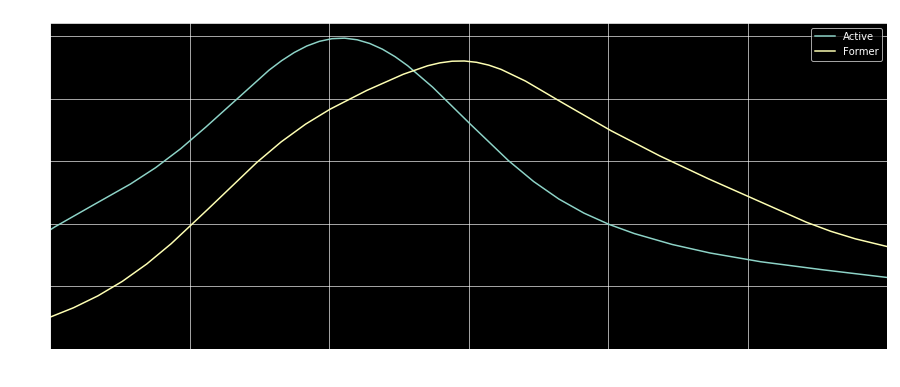

In [17]:
# Age dist by attrition
    # probability density function estimation by KDE

plt.figure(figsize = (15, 6))
plt.style.use(['fast', 'dark_background']) # dark_background + fast -> fast only for true dark
plt.grid(True, alpha  = 0.8)

sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Active')
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Former')

plt.xlim(left = 20, right = 50)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution by attrition');

In [18]:
# Older have higher attrition rates

In [19]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [20]:
ed = pd.DataFrame(columns = ['Field', '% of Former'])
i = 0 

for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField'] == field) & (df['Attrition'] == 'Yes')].shape[0]/ df[df['EducationField']  == field].shape[0]
    ed.loc[i] = (field, ratio*100)
    i += 1
        
ed = ed.groupby(by = 'Field').sum()
ed.iplot(kind = 'bar', title = '% of former by education')
    

In [21]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [22]:
print('Distribution of former by gender: Male = {:.1f}%; Female {:.1f}%.'.format((df[(df['Attrition'] == 'Yes') & 
                                                                                        (
    df['Gender'] == 'Male')].shape[0] / df[df['Gender'] == 'Male'].shape[0])*100, 
                                                                                 (df[(df['Attrition'] == 'Yes') & 
                                                                                        (
                                                                                     df['Gender'] == 'Female')].shape[0] / df[df['Gender'] == 'Female'].shape[0])*100))

Distribution of former by gender: Male = 17.0%; Female 14.8%.


In [23]:
gen = pd.DataFrame(columns = ['Gender', '% of former'])
i = 0 

for field in list(df['Gender'].unique()):
    ratio = df[(df['Gender'] == field) & 
               (df['Attrition'] == 'Yes')].shape[0] / df[df['Gender'] == field].shape[0]
    gen.loc[i] = (field, ratio*100)
    i += 1
    
gen = gen.groupby(by = 'Gender').sum()
gen.iplot(kind = 'bar', title = '% of former by gender')

In [24]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [25]:
ma = pd.DataFrame(columns = ['Marital Status', '% of former'])
i = 0 

for field in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus'] == field) & 
               (df['Attrition'] == 'Yes')].shape[0] / df[df['MaritalStatus'] == field].shape[0]
    ma.loc[i] = (field, ratio*100)
    i += 1
    
ma = ma.groupby(by = 'Marital Status').sum()
ma.iplot(kind = 'bar', title = '% of former by marital status')

In [26]:
print('Distance from home ranges from {} to {} miles'.format(df['DistanceFromHome'].min(), 
                                                 df['DistanceFromHome'].max()))

Distance from home ranges from 1 to 29 miles


In [27]:
print('Mean distance from home for current: {:.2f} miles, for former {:.2f} miles'.format(df[df['Attrition'] == 'No']['DistanceFromHome'].mean(),
                                                                                                   df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Mean distance from home for current: 8.92 miles, for former 10.63 miles


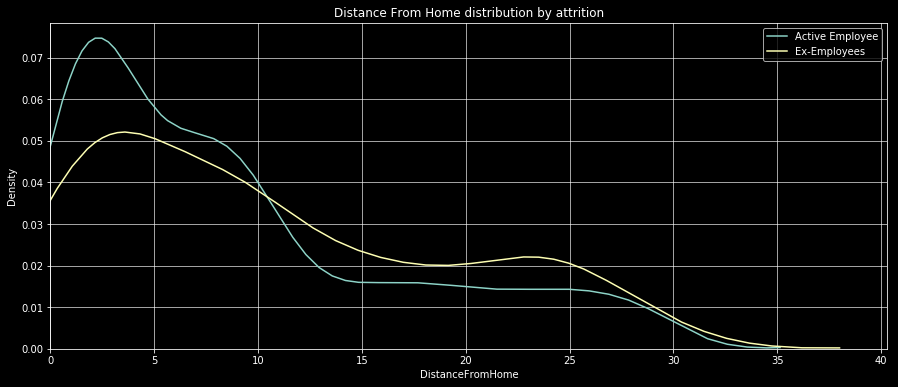

In [28]:
plt.figure(figsize = (15, 6))
plt.style.use('fast')
plt.grid(True, alpha = 0.8)

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')

sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')

plt.xlabel('DistanceFromHome')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Distance From Home distribution by attrition');

In [29]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [30]:
de = pd.DataFrame(columns = ['Department', '% of former'])
i = 0 

for field in list(df['Department'].unique()):
    ratio = df[(df['Department'] == field) & 
               (df['Attrition'] == 'Yes')].shape[0] / df[df['Department'] == field].shape[0]
    de.loc[i] = (field, ratio*100)
    i += 1
    
de = de.groupby(by = 'Department').sum()
de.iplot(kind = 'bar', title = '% of former by Department')

In [31]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [32]:
jr = pd.DataFrame(columns = ['Job Role', '% of former'])
i = 0 

for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole'] == field) & 
               (df['Attrition'] == 'Yes')].shape[0] / df[df['JobRole'] == field].shape[0]
    jr.loc[i] = (field, ratio*100)
    i += 1

jr = jr.groupby(by = 'Job Role').sum()
jr.iplot(kind = 'bar', title = '% of former by job role')

In [33]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [34]:
jl = pd.DataFrame(columns = ['Job Level', '% of former'])
i = 0 

for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel'] == field) &
              (df['Attrition'] == 'Yes')].shape[0] / df[df['JobLevel'] == field].shape[0]
    jl.loc[i] = (field, ratio*100)
    i += 1 
    
jl = jl.groupby('Job Level').sum()
jl.iplot(kind = 'bar', title = '% of former by job level')

In [35]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [36]:
ji = pd.DataFrame(columns = ['Job Involvement', '% of former'])
i = 0 

for field in list(df['JobInvolvement'].unique()):
    ratio = df[(df['JobInvolvement'] == field) &
              (df['Attrition'] == 'Yes')].shape[0] / df[df['JobInvolvement'] == field].shape[0]
    ji.loc[i] = (field, ratio*100)
    i +=1
    
ji = ji.groupby('Job Involvement').sum()
ji.iplot(kind = 'bar', title = '% of former by job involvement')

In [37]:
# Linear pattern 
    # higher job involvement = high retention 
    

In [38]:
print('Training time range: {} to {} years'.format(df['TrainingTimesLastYear'].min(),
                                                  df['TrainingTimesLastYear'].max()))

Training time range: 0 to 6 years


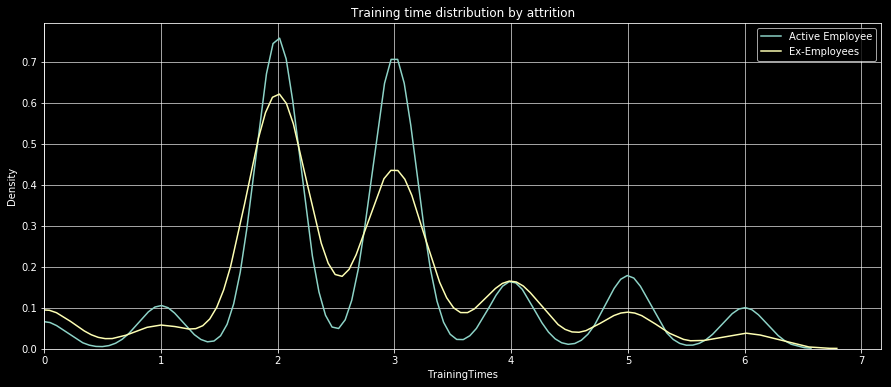

In [39]:
plt.figure(figsize = (15, 6))
plt.style.use(['fast', 'dark_background'])
plt.grid(True, alpha = 0.8)

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')

sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')

plt.xlabel('TrainingTimes')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Training time distribution by attrition');

In [40]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [41]:
nc = pd.DataFrame(columns = ['NumWorked', '% of former by NumWorked'])
i = 0 

for field in list(df['NumCompaniesWorked'].unique()):
    ratio = df[(df['NumCompaniesWorked'] == field) & 
              (df['Attrition'] == 'Yes')].shape[0] / df[df['NumCompaniesWorked'] == field].shape[0]
    nc.loc[i] = (field, ratio*100)
    i += 1 
    
nc = nc.groupby('NumWorked').sum()
nc.iplot(kind = 'bar', title = '% of former by NumWorked')

In [42]:
print('Years at company range: {} to {}'.format(df['YearsAtCompany'].min(),
                                               df['YearsAtCompany'].max()))

Years at company range: 0 to 40


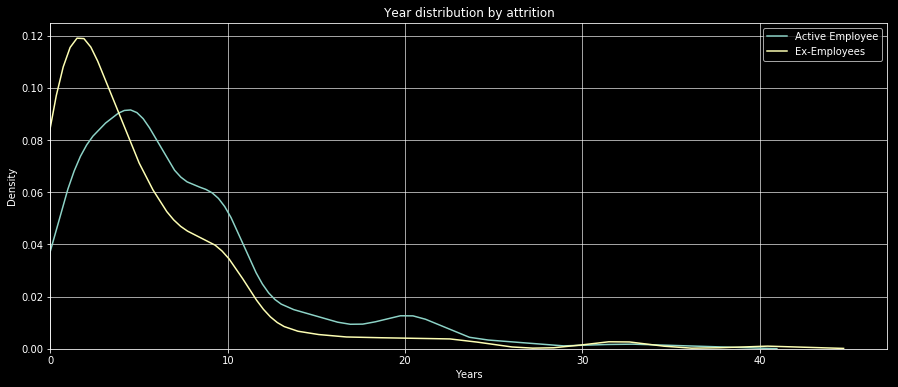

In [43]:
plt.figure(figsize = (15, 6))
plt.style.use(['fast', 'dark_background'])
plt.grid(True, alpha = 0.8)

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')

sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')

plt.xlabel('Years')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Year distribution by attrition');

In [44]:
# Dependent 

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [45]:
print('% of former is: {}, active is {}'.format(df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100,
                                               df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100))

% of former is: 16.122448979591837, active is 83.87755102040816


In [46]:
# Correlations 

df_a['Target'] = df_a['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

df_a = df_a.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], 
                axis = 1)

corr = df_a.corr()['Target'].sort_values()

print('Positive corr: \n', corr.tail(5))
print('Negative corr: \n', corr.head(5))

Positive corr: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64
Negative corr: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


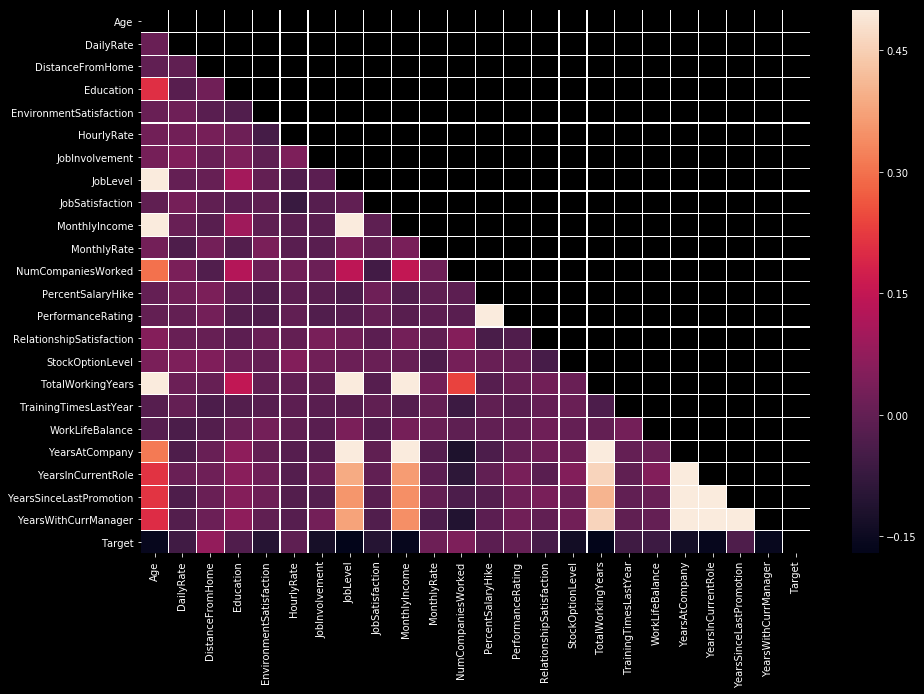

In [47]:
# Calc corr
corr = df_a.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Vis
plt.figure(figsize = (15, 10))
sns.heatmap(corr, vmax = 0.5, mask = mask, linewidths = 0.2)

In [48]:
# Label encoder object

le = LabelEncoder()

In [49]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [50]:
# le applied to cols with =< 2 unique values

le_count = 0 

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            
print('{} cols with label encoded'.format(le_count))

4 cols with label encoded


In [51]:
# Convert remaining CATs to dummies 

df = pd.get_dummies(df, drop_first = True)
print(df.shape)
df.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [52]:
# Feature scaling 

# Use MinMaxScaler 

    # decrease range to between 0 and n 
    
    # Models performance improves when numerical inputs fall within similar scale 
    
# Scale between 0 and 5 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 5)) # range 

df_col = list(df.columns)
df_col.remove('Attrition') 

for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
    
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast = 'float')

print('Scaled and Encoded data: {}'.format(df.shape))
df.head()

Scaled and Encoded data: (1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [53]:
# Assign label to new df 
    # convert to num
    
lab = df['Attrition'].copy()
type(lab)

pandas.core.series.Series

In [54]:
# Drop label in main 

df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'],
       axis = 1, inplace = True)

df.shape

(1470, 44)

In [55]:
# Class imbalance 
    # greater active than former 
    
# stratify = label to maintain same ratio in train when splitting

# random_state must be specified lest different train and test values each time code is executed 

x_train, x_test, y_train, y_test = train_test_split(df, lab, 
                                         test_size = 0.25, random_state = 7, 
                                         stratify = lab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 44)
(368, 44)
(1102,)
(368,)


In [56]:
# Model selection

# List
model = []

# Append list 
model.append(('Logistic Regression', LogisticRegression(solver = 'liblinear', random_state = 7,
                                                        class_weight = 'balanced')))

model.append(('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 7)))

model.append(('SVM', SVC(gamma = 'auto', random_state = 7)))

model.append(('KNN', KNeighborsClassifier()))

model.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state = 7)))

# Naive Bayes
model.append(('Gaussian NB', GaussianNB()))

In [57]:
# Performance measure selection 

# Create table for performance results 

col = ['Model', 'ROC-AUC mean', 'ROC-AUC-STD', 'ACC mu', 'ACC theta']

df_results = pd.DataFrame(columns = col)
i = 0 

df_results.head()

,Model,ROC-AUC mean,ROC-AUC-STD,ACC mu,ACC theta


In [58]:
# Cross-validation eval.

# Lists 
acc_results = []
auc_results = []
names = []

# Run models 
for name, model in model:
    kfold = model_selection.KFold(n_splits = 10, 
                                  random_state = 7) # 10 folds 
    # ACC
    cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    # ROC-AUC
    cv_auc_results = model_selection.cross_val_score(model, x_train, y_train,
                                                     cv = kfold,
                                                     scoring = 'roc_auc')
    # Append lists 
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    
    df_results.loc[i] = [name, 
                        round(cv_auc_results.mean()*100, 2), 
                        round(cv_auc_results.std()*100, 2), 
                        round(cv_acc_results.mean()*100, 2), 
                        round(cv_acc_results.std()*100, 2)
                        ]
    i += 1
    
df_results.sort_values(by = ['ROC-AUC mean'], ascending = False)

,Model,ROC-AUC mean,ROC-AUC-STD,ACC mu,ACC theta
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


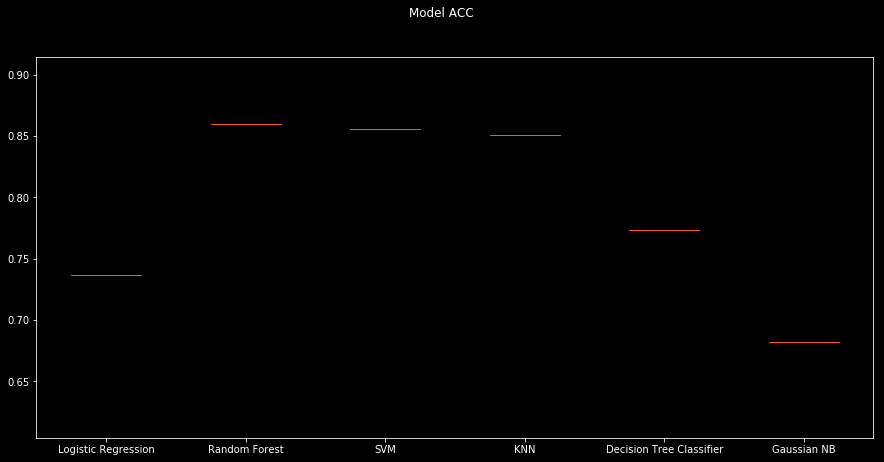

In [59]:
fig = plt.figure(figsize = (15, 7))
fig.suptitle('Model ACC')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.style.use('fivethirtyeight')
plt.show();

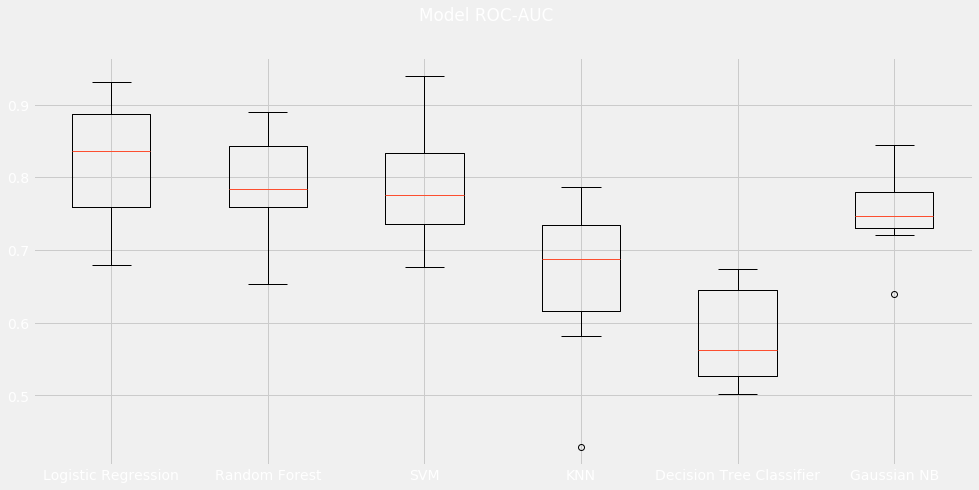

In [60]:
fig = plt.figure(figsize = (15, 7))
fig.suptitle('Model ROC-AUC')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show();

In [61]:
# Logit and RF 

# RF bagging = averaging to improve acc + control overfitting 
    # good for feature importance identification


In [62]:
# Logit 
kfold = model_selection.KFold(n_splits = 10, random_state = 7)

modelCV = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', random_state = 7)

scoring = 'roc_auc'

results = model_selection.cross_val_score(modelCV, x_train, y_train, cv = kfold, scoring = scoring)

print('AUC = %.2f, STD = %.2f' % (results.mean(), results.std()))

AUC = 0.82, STD = 0.08


In [63]:
# Adjust hyper-params 

# GridSearchCV search for over specified param values for an estimator 

param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper param list for adjusting 

log_gs = GridSearchCV(LogisticRegression(solver = 'liblinear', class_weight = 'balanced',
                                             random_state = 7), 
                         iid = True,
                         return_train_score = True,
                         param_grid = param_grid,
                         scoring = 'roc_auc',
                         cv = 10)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print('best params =' + str(log_gs.best_estimator_))
print('best params =' + str(log_gs.best_params_))
print('best score =', log_gs.best_score_)
print('='*20)

best params =LogisticRegression(C=0.05099999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params ={'C': 0.05099999999999999}
best score = 0.8180815631000706


Text(0.5, 257.44, 'Predicted attrition')

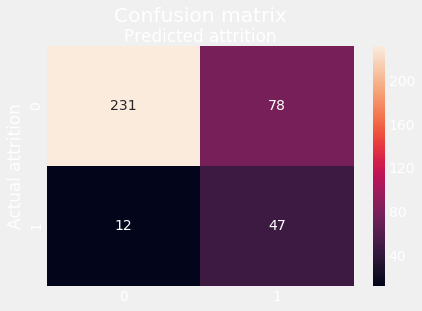

In [64]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(x_test))
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Vis
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual attrition')
plt.xlabel('Predicted attrition')

In [65]:
# 0 = Active 
# 1 = Former 

    # Classifier predicted 243 Active / 125 Former 
    
    # Actual = 309 Active / 59 Former 
    
    # 231 = TP
    
    # 12 = FP 
    
    # 78 = FN 
    
    # 47 = TN 
    
        # ACC = TP + TN / Total P + N 

In [66]:
print('Logit ACC on test: {:.2f}'.format(log_opt.score(x_test, y_test)*100))

Logit ACC on test: 75.54


In [67]:
# Precision & recall

log_opt.fit(x_train, y_train)

print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       309
         1.0       0.38      0.80      0.51        59

    accuracy                           0.76       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.76      0.78       368



In [68]:
log_opt.fit(x_train, y_train) # fit optimised model to the train set

probs = log_opt.predict_proba(x_test) # predict probabilities

probs = probs[:, 1] #  only keep probabilities associated with former

logit_roc_auc = roc_auc_score(y_test, probs) # calc AUC using test set

print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


In [69]:
# Sensitivity = TP / TP + FN = True positive r (Recall)
    # % of positives predicted as positives 

# Specificity = TN / TN + FP = True negative r 
    # % of negatives mispredicted as positive 

# Precision = TP / TP + FP 
    # num of correct positives / predicted positives 

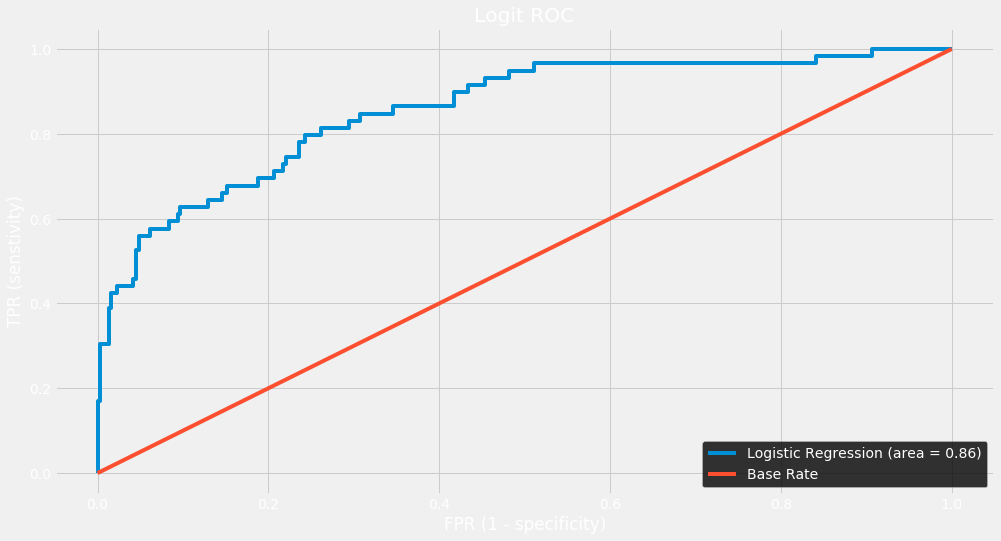

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))

plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)

plt.plot([0, 1], label = 'Base Rate')

plt.xlabel('FPR (1 - specificity)')
plt.ylabel('TPR (senstivity)')
plt.title('Logit ROC')
plt.style.use(['fast', 'dark_background'])
plt.legend(loc = 'lower right')
plt.show();

In [71]:
rf_tune = RandomForestClassifier(class_weight = 'balanced',
                                random_state = 7)

param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_tune,
                       iid = True,
                       return_train_score = True,
                       param_grid = param_grid,
                       scoring = 'roc_auc',
                       cv = 10)

grid_fit = grid_obj.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=75, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 75}
best score: 0.7956083711198764


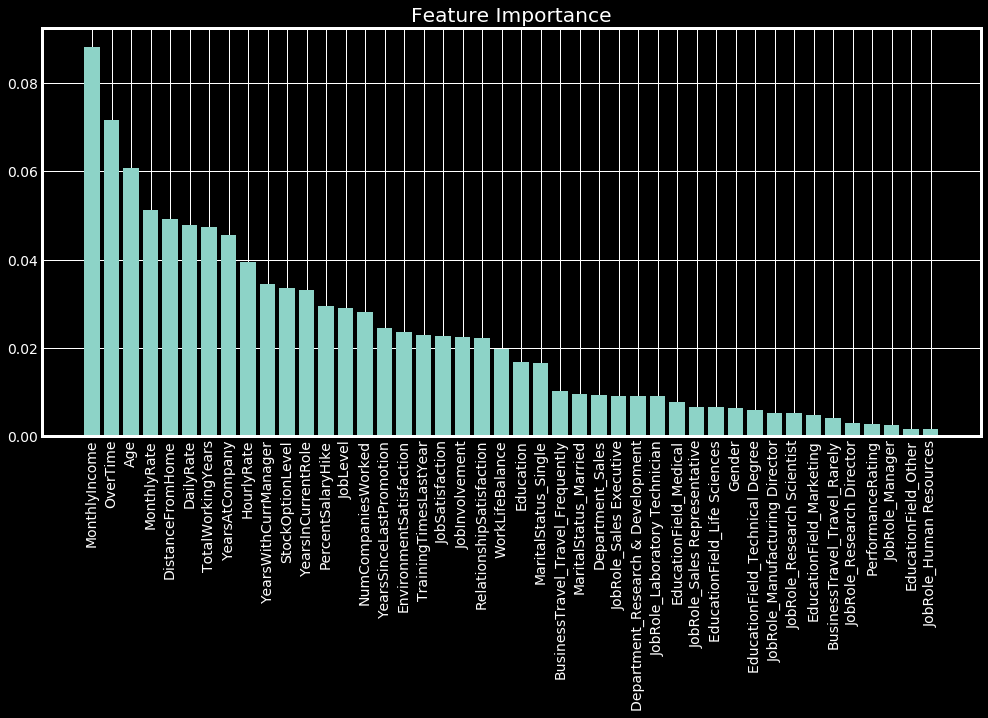

In [72]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices]) 
plt.xticks(range(x_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() 

In [73]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = x_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.088179
1,OverTime,0.071542
2,Age,0.060858
3,MonthlyRate,0.051225
4,DistanceFromHome,0.049128
5,DailyRate,0.047802
6,TotalWorkingYears,0.047392
7,YearsAtCompany,0.045513
8,HourlyRate,0.039374
9,YearsWithCurrManager,0.034526


Text(0.5, 257.44, 'Predicted label')

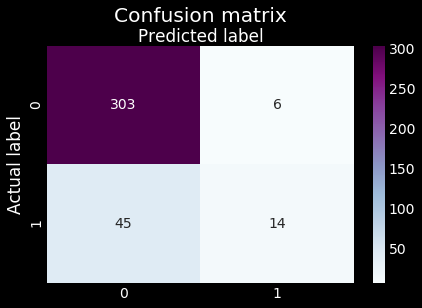

In [74]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = 'BuPu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
print('RF tuned on test set: {:.2f}'.format(rf_opt.score(x_test, y_test)*100))

RF tuned on test set: 86.14


In [76]:
rf_opt.fit(x_train, y_train)

print(classification_report(y_test, rf_opt.predict(x_test)))

rf_opt.fit(x_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(x_test) # 
probs = probs[:, 1] #  keep probabilities associated with former
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calc AUC score test 
print('AUC score: %.3f' % rf_opt_roc_auc)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       309
         1.0       0.70      0.24      0.35        59

    accuracy                           0.86       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368

AUC score: 0.818


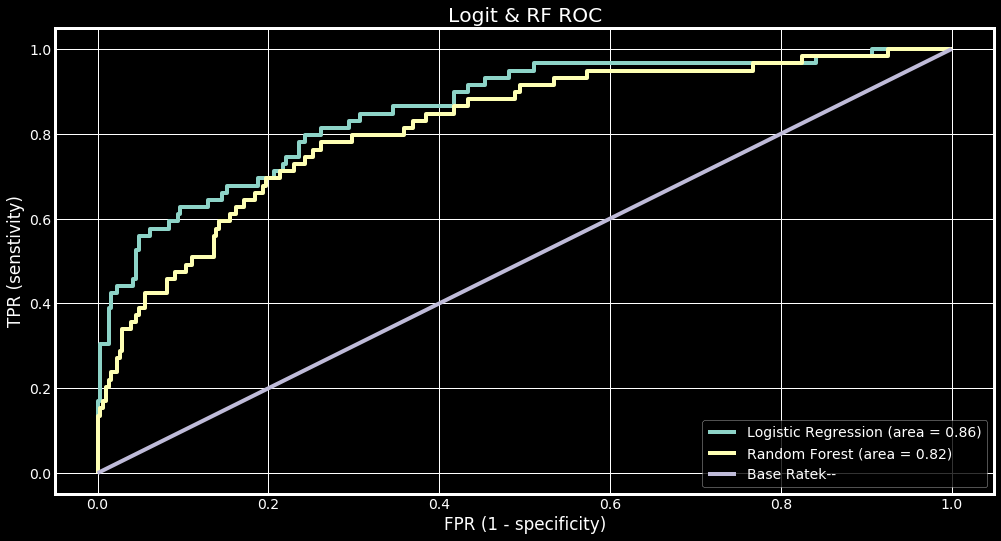

In [77]:
plt.figure(figsize = (15, 8))

plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(x_test)[:,1])
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

plt.plot([0, 1], [0, 1], label = 'Base Rate' 'k--')
plt.xlabel('FPR (1 - specificity)')
plt.ylabel('TPR (senstivity)')
plt.title('Logit & RF ROC')
plt.style.use(['fast', 'dark_background'])
plt.legend(loc = 'lower right')
plt.show();